In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances

#For plotting
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import scatter_matrix

from itertools import chain

##### The following is cleaning and preparing data. There is no need to run it again.

In [84]:
# Load data from Steam Charts data file, scrapped by Alex.
data = pd.read_csv('Alex_SteamCharts.csv',index_col=False)

# Clean data
data = data.iloc[2:].reset_index(drop=True)#.drop(columns='Unnamed: 0')

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})
data = data[2:].reset_index(drop=True).drop(columns='Unnamed: 0')

# Save the cleaned data as 'SteamCharts.csv'
data.to_csv('SteamCharts.csv',index=False)

In [ ]:
# Load data from Steam Charts data file
data = pd.read_csv('SteamCharts.csv',index_col=False)

# Make percentile into number and clear "-"
data = data.replace(to_replace='%', value='', regex=True).replace({'-':'NaN'})

# Get Perc_Gain.
p_gain = data.loc[data['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last_30_Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

# Get Avg_Players.
avg_players = data.loc[data['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last_30_Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)

# Get Peak_Players.
peak_players = data.loc[data['Peak_Players']==1]
peak_players = peak_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last_30_Days'])
peak_pure = peak_players.drop(columns=['App_id', 'Name']).astype(float)

# Add columns of max and mean
avg_players['max'] = avg_pure.max(axis=1)
avg_players['mean'] = avg_pure.mean(axis=1)

peak_players['peak_max'] = peak_pure.max(axis=1)
peak_players['peak_mean'] = peak_pure.mean(axis=1)

In [91]:
steamspy = pd.read_csv('steamspy_owners.csv')
steamspy = steamspy.rename(columns={'QueryID':'App_id','0':'SteamSpyOwnersNew'}, errors="raise")

In [109]:
# Load data from Steam Spy data file. Do not run this, or download 'games-features-metacritic-new.csv' before you run:
features = pd.read_csv('games-features-metacritic-new.csv',index_col=False)
features = features.drop_duplicates(subset=['QueryID','QueryName'], keep='first', inplace=False, ignore_index=False)
features = features.drop(columns=['ResponseID', 'ResponseName'])
features = features.rename(columns={'QueryID':'App_id','QueryName':'Name'}, errors="raise")
#features = features.drop_duplicates(subset=['ResponseID','ResponseName'], keep='first', inplace=False, ignore_index=False)
#features = features.drop(columns=['QueryID', 'QueryName','RequiredAge'])
#features = features.rename(columns={'ResponseID':'App_id','ResponseName':'Name'}, errors="raise")

# Combine data from Steam Charts and Steam Spy, order it by 'max' and save it as 'AllData.csv'
data_all = pd.merge(features, steamspy[['App_id','SteamSpyOwnersNew']], how='inner', on=['App_id'])
data_all = pd.merge(data_all, peak_players[['App_id','peak_max','peak_mean']], how='inner', on=['App_id'])
data_all = pd.merge(data_all, avg_players[['App_id','max','mean']], how='inner', on=['App_id'])
data_all.sort_values(by=['max'], ascending=False, inplace=True)

data_all.reset_index(drop=True).drop(columns='Unnamed: 0').to_csv('AllData.csv',index=False)

## Start your data anlaysis here:

Explanation of the csv files:

The file 'SteamCharts.csv'contains monthly data of 'Avg_Players', 'Gain', 'Perc_Gain' and 'Peak_Players' (obtained from Steam Charts by Alex).

The file 'AllData.csv' contains 70+ game features (obtained from Steam Spy by Kanishk), together with the max and mean of 'Avg_Players' and the max and mean of 'Peak_Players'. This file is a combination of Steam Spy data and Steam Charts data through the common 'App_id's. It is currently sorted by the max of 'Avg_Players'.


In [105]:
data_charts = pd.read_csv('SteamCharts.csv',index_col=False,low_memory=False)
data_charts

,Name,App_id,Avg_Players,Gain,Perc_Gain,Peak_Players,Last_30_Days,April_2021,March_2021,February_2021,...,April_2013,March_2013,February_2013,January_2013,December_2012,November_2012,October_2012,September_2012,August_2012,July_2012
0,Counter-Strike: Global Offensive,730,1.0,0.0,0.0,0.0,694478.21,723346.52,740927.82,741013.24,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,Counter-Strike: Global Offensive,730,0.0,1.0,0.0,0.0,-28868.3,-17581.31,-85.42,-2196.42,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,Counter-Strike: Global Offensive,730,0.0,0.0,1.0,0.0,-3.99,-2.37,-0.01,-0.30,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,Counter-Strike: Global Offensive,730,0.0,0.0,0.0,1.0,1119102,1148077.00,1198581.00,1123485.00,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642.00
4,Dota 2,570,1.0,0.0,0.0,0.0,412538.77,413784.97,390412.76,404832.13,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50095,Hentai Splash 2,1315460,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
50096,Depth Siege Atlantis,849550,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
50097,Depth Siege Atlantis,849550,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
50098,Depth Siege Atlantis,849550,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [110]:
data = pd.read_csv('AllData.csv')
data

,App_id,Name,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,...,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,SteamSpyOwnersNew,peak_max,peak_mean,max,mean
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,Dec 21 2017,0,0,1,0,86,11,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,56061000.0,3236027.0,1.038021e+06,1584886.77,470328.382800
1,730,Counter-Strike: Global Offensive,Aug 21 2012,0,0,1,0,83,8,1,...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,83851000.0,1305714.0,5.562232e+05,857604.22,316635.260189
2,570,Dota 2,Jul 9 2013,0,0,1,0,90,4,0,...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,174686000.0,1291328.0,7.820687e+05,709178.26,452757.727453
3,1091500,Cyberpunk 2077,Dec 9 2020,17,0,1,0,85,12,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,16006000.0,830387.0,2.302768e+05,332395.65,93077.502000
4,377160,Fallout 4,Nov 9 2015,17,0,1,7,84,10,1,...,Recommended:OS: Windows 7/8/10 (64-bit OS requ...,,,,,6343000.0,471955.0,4.275848e+04,226297.83,22651.106970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,1556200,Predator: Hunting Grounds,Apr 29 2021,17,0,1,7,62,1,3,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,-1.0,NaN,NaN,NaN,NaN
10587,1042380,Hundred Days,May 13 2021,0,0,1,1,-1,2,1,...,,,,Minimum:OS: 10.14.5Processor: 2.5 Ghz Intel Co...,,76000.0,NaN,NaN,NaN,NaN
10588,1090760,Distant Kingdoms,May 5 2021,0,0,1,0,-1,3,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,9000.0,NaN,NaN,NaN,NaN
10589,885970,Total War: ROME REMASTERED,Apr 29 2021,0,0,2,1,-1,2,1,...,Recommended:OS: Windows 10 64-bit (version 20H...,Minimum:OS: Ubuntu 20.04 64-bitProcessor: Inte...,Recommended:OS: Ubuntu 20.04 64-bitProcessor: ...,Minimum:OS: macOS 11 Big SurProcessor: Intel C...,,-1.0,NaN,NaN,NaN,NaN


In [99]:
#standard: a column name used to rank the games
#ranks: a list of rank cutoffs

def grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=(12,12)):
       
    grade = list(range(1,len(ranks)+1))
    a = np.array(ranks[1:]+[len(data)] ) - np.array( [0] + ranks[1:])
    grades = []
    for i in range(len(grade)):
        grades.append( [grade[i]]*a[i] )    
    grades = list(chain(*grades))
    
    # Sort data according to the 'standard'
    data_copy=data.copy()
    data_copy.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
    avg_graded = data_copy#.loc[data[standard]>=1].copy()

    # Rank the games
    if plot_cutoff:
        print('Using '+str(standard)+' :')
        for i in ranks:
            print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
    #counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
    #print(counts)

    #avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
    avg_graded['Grade'] = grades

    data_clean = avg_graded[[#'ReleaseDate', 
        'CategorySinglePlayer',
       'CategoryMultiplayer', 
       'GenreIsIndie', 
                         'GenreIsAction', 
                         'GenreIsAdventure', 
                         'GenreIsCasual',
       'GenreIsStrategy', 
                         'GenreIsRPG', 
                         'GenreIsSimulation','Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

    data_clean.columns = ['Single', 'Multi', 'Indie',
       'Action', 'Adventure', 'Casual', 'Strategy',
       'RPG', 'Simulation', 'Grade']

    data_test = {}
    for i in grade:
        data_test[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
        
    if plot_figures:
        plt.figure(figsize=fig_size)
        for i in grade:
            plt.plot(data_test[i].columns,data_test[i].mean(),label='Grade '+str(i))

        plt.legend()
        plt.title('By max of Avg_players')
        plt.show()
    return data_test

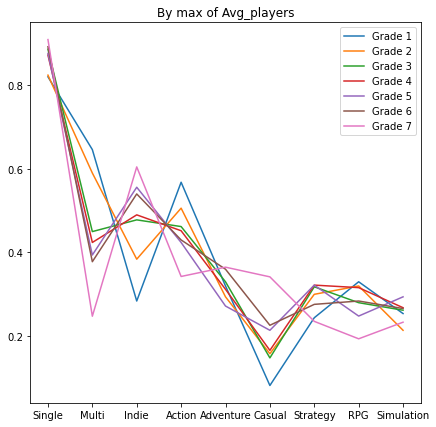

In [100]:
# We plot one figure given one ranking method here:
fig_size=(7,7)
ranks = list(np.arange(0,3500,500))
data_max = grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=fig_size)

In [101]:
# This function plots different methods together:
def grade_analysis_plot_all(methods,ranks,fig_size=(24,6)):
    fig,ax=plt.subplots(1,len(methods),figsize=fig_size)
    for j in range(len(methods)):
        data_copy = grade_analysis(ranks,standard= methods[j], plot_figures=False)
        for i in list(range(1,len(ranks)+1)):    
            ax[j].plot(data_copy[i].columns,data_copy[i].mean(),label='Grade '+str(i))
            ax[j].set_title('By '+str(methods[j]))
        ax[j].legend()
    plt.show()

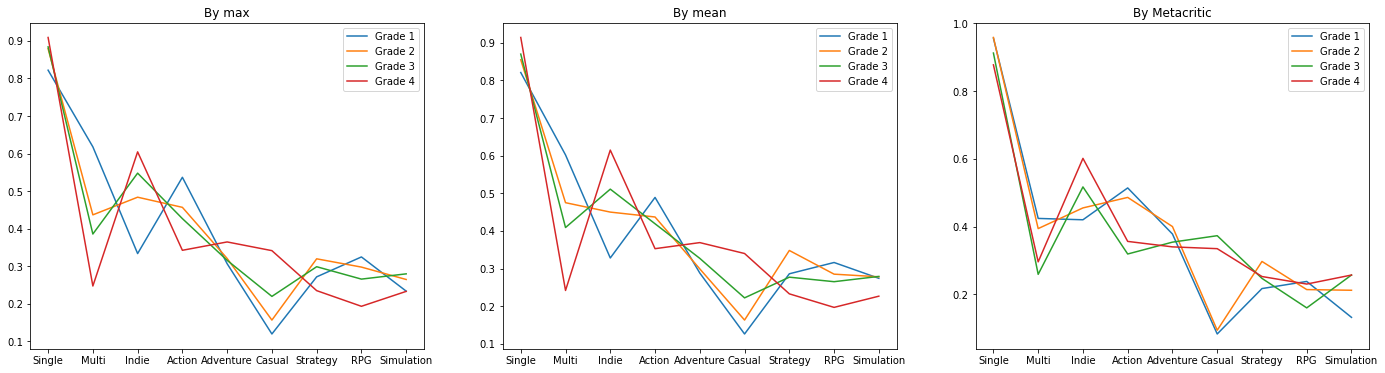

Rank cutoffs are [0, 1000, 2000, 3000]


In [102]:
methods = ['max','mean','Metacritic']
ranks = list(np.arange(0,3500,1000))
grade_analysis_plot_all(methods,ranks,fig_size=(24,6))
print('Rank cutoffs are '+str(ranks))

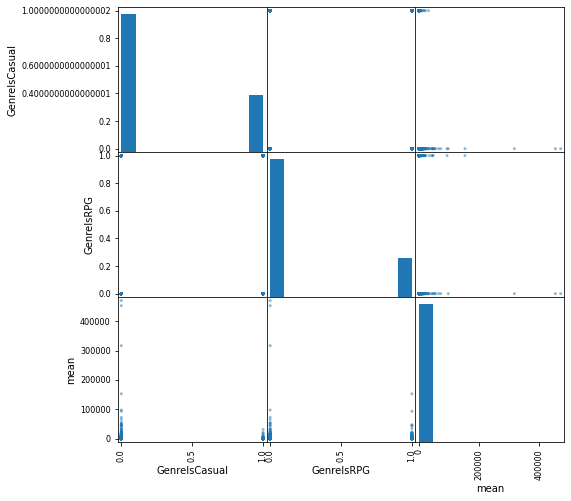

In [103]:
data_test = data[[ #'RecommendationCount',
        #'CategorySinglePlayer',
       #'CategoryMultiplayer', 
#       'GenreIsIndie', 
#                       'GenreIsAction', 
#                        'GenreIsAdventure', 
                        'GenreIsCasual',
#       'GenreIsStrategy', 
                         'GenreIsRPG', 
#                        'GenreIsSimulation', 
       #'PriceFinal',
                        'mean']].astype(float)

scatter_matrix(data_test,figsize=(8,8))
plt.show()

In [ ]:
data.mean()